In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_rows', None)
import scipy.stats as stats
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import shapiro
from numpy import random

## Visualising attributes in the Brachytherapy via a matrix
### Importing data

In [10]:
diagnosis = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\interim\diagnosis.csv")
diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             98 non-null     int64  
 1   perfor_status  84 non-null     float64
 2   has_concom     85 non-null     object 
 3   concom_name    32 non-null     object 
 4   T              85 non-null     object 
 5   N              85 non-null     float64
 6   M              84 non-null     float64
 7   figo           85 non-null     object 
 8   PT             85 non-null     float64
 9   tumor_size     85 non-null     object 
 10  growth_type    85 non-null     float64
 11  VI             85 non-null     float64
 12  PaR            85 non-null     object 
 13   PaL           85 non-null     object 
 14  UI             85 non-null     object 
 15  ct_abdomen     85 non-null     object 
 16  ct_pelvic      85 non-null     object 
 17  mri_pelvic     85 non-null     object 
dtypes: float64(6

In [11]:
brachytherapy = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\interim\brachytherapy.csv")
brachytherapy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  98 non-null     int64  
 1   last_brachy_date    85 non-null     object 
 2   applicator_name     85 non-null     object 
 3   total_apoint_left   80 non-null     float64
 4   total_apoint_right  80 non-null     float64
 5   icru_rectum         80 non-null     float64
 6   icru_bladder        83 non-null     float64
 7   hrctv_volume        85 non-null     float64
 8   eqd2_bladder        85 non-null     float64
 9   eqd2_rectum         85 non-null     float64
 10  eqd2_sigmoid        85 non-null     float64
 11  eqd2_hrbrachy_dose  85 non-null     float64
 12  eqd2_total_dose     85 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.1+ KB


In [16]:
hue_attribute = 'tumor_size'
categ_attribute = 'has_concom'
comparison_attributes = ['id', 'icru_rectum','icru_bladder','hrctv_volume','eqd2_total_dose','eqd2_hrbrachy_dose']
df = diagnosis[['id',hue_attribute, categ_attribute]].merge(brachytherapy[comparison_attributes], on='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  98 non-null     int64  
 1   tumor_size          85 non-null     object 
 2   has_concom          85 non-null     object 
 3   icru_rectum         80 non-null     float64
 4   icru_bladder        83 non-null     float64
 5   hrctv_volume        85 non-null     float64
 6   eqd2_total_dose     85 non-null     float64
 7   eqd2_hrbrachy_dose  85 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.9+ KB


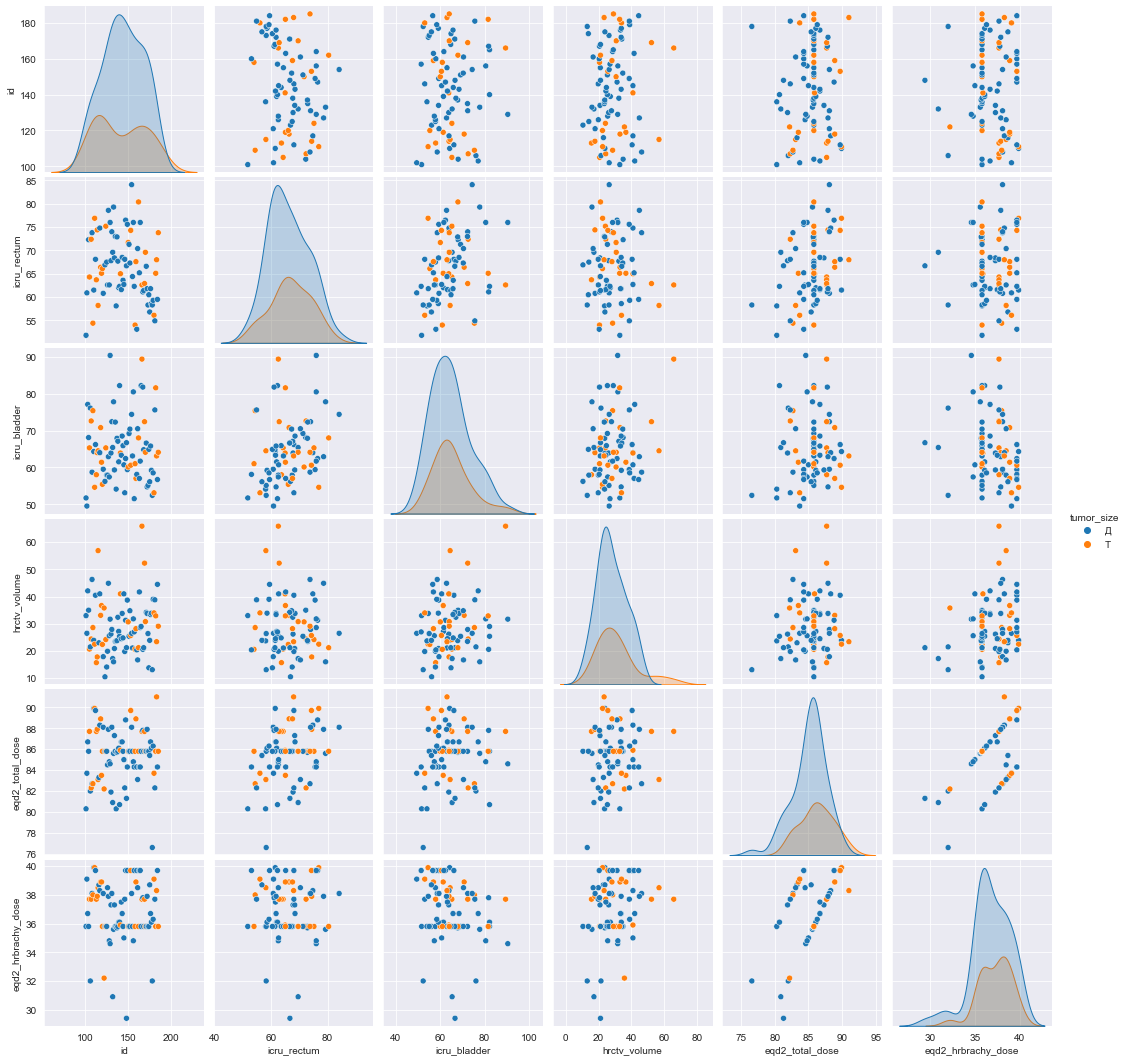

In [17]:
sns.pairplot(df,hue=hue_attribute)

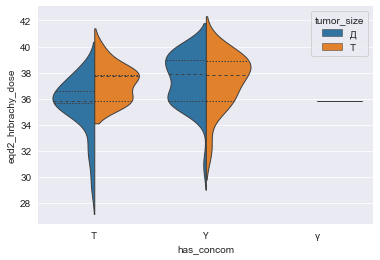

In [19]:
sns.violinplot(data=df, x=categ_attribute, y='eqd2_hrbrachy_dose', hue=hue_attribute,
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)